# Linear Regression 


### Plotting the data
Before starting on any task, it is often useful to understand the data by visualizing it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header = None, names = ['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


Plot the data

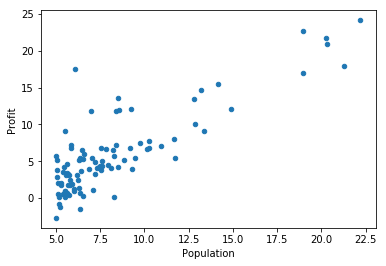

In [5]:
data.plot(x = 'Population', y = 'Profit', kind = 'scatter')

### Cost function
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

    

In [7]:
# Define cost function
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [8]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [9]:
# The shape attribute for numpy arrays returns the dimensions of the array. 
#  If Y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n. shape[1] is m
rows = data.shape[0] 
cols = data.shape[1] 
# The iloc indexer syntax is data.iloc[<row selection>, <column selection>]
X = data.iloc[:, 0:cols-1] 
y = data.iloc[:,cols-1:cols]


In [10]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [11]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Transform data

In [12]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))
theta

matrix([[0, 0]])

In [13]:

X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [14]:
computeCost(X, y, theta)

32.072733877455676

### Batch gradient descent
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$


In [15]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[: ,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term))
        
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [16]:
alpha = 0.01
iters = 1000

In [17]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [18]:
computeCost(X, y, g)

4.515955503078912

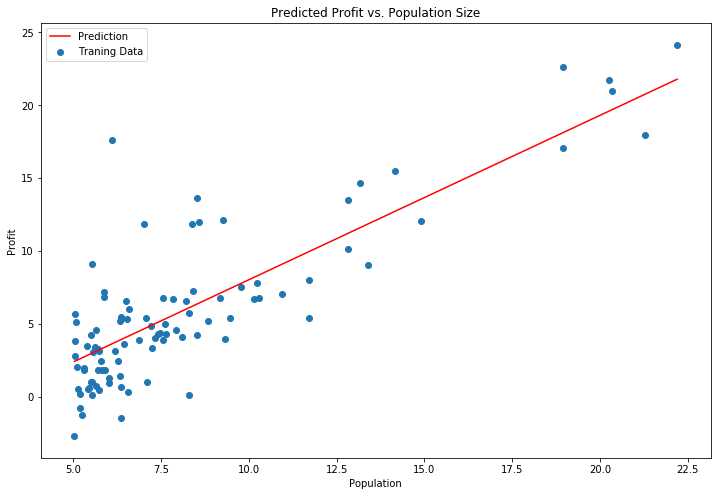

In [19]:

x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

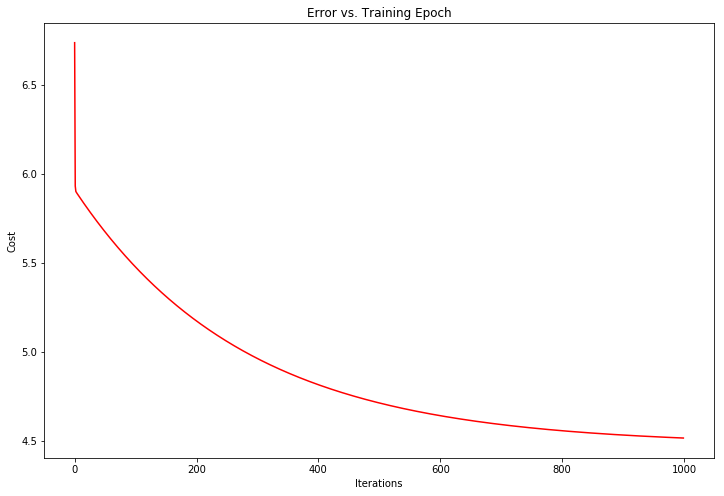

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [21]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header = None, names = ['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [22]:
data2 = (data2 - data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [23]:
# add one column
data2.insert(0,'Ones',1)

# Set X(Traning data) and y(target variable)
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]

# convert to matrices and intialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0, 0, 0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost(error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

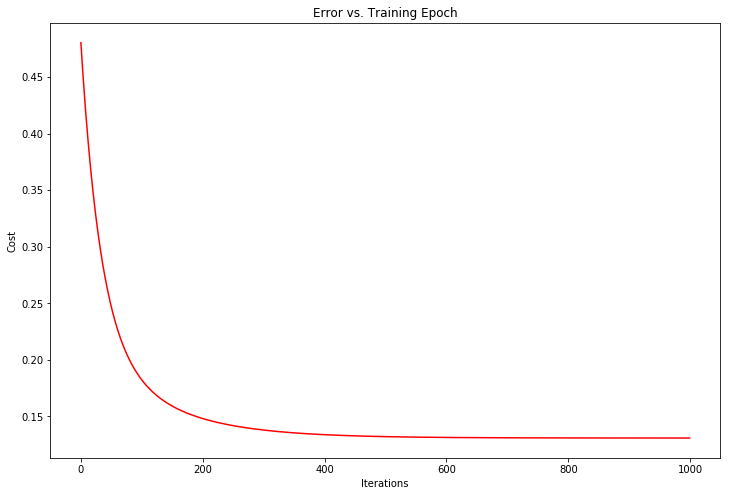

In [24]:

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [25]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

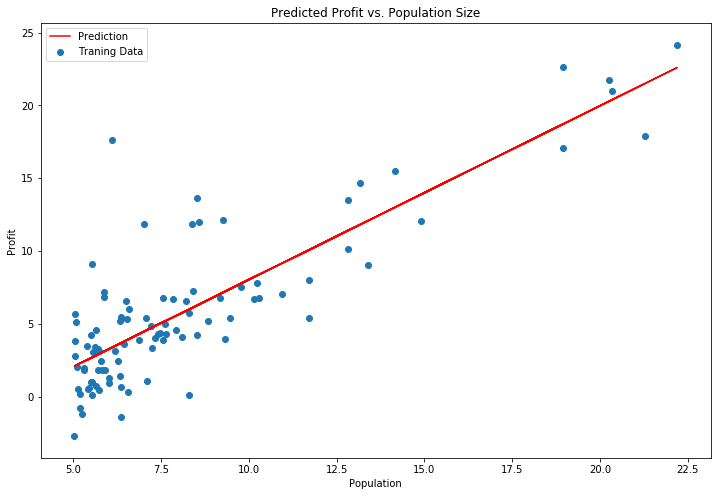

In [26]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label = 'Prediction')
ax.scatter(data.Population, data.Profit, label = 'Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [27]:

def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [28]:
final_theta2=normalEqn(X, y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])